In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from collections import defaultdict
import os
import pandas as pd
import time
import seaborn
import matplotlib as mpl

In [2]:
mpl_config = os.path.join(mpl.get_configdir())
os.listdir(mpl_config)

['latexstyle2.mplstyle', 'latexstyle3.mplstyle', 'latexstyle.mplstyle']

In [3]:
plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle3.mplstyle'))

In [4]:
t71 = '/media/ak/T71'
experiments_folder = os.path.join(t71, 'August11th2022Experiments')
expOne = os.path.join(experiments_folder, 'ExperimentOne')
returns_folder = os.path.join(experiments_folder, 'Returns')
expInputFiles_folder = os.path.join(experiments_folder, 'ExperimentInputFiles')
LinearMMD_folder = os.path.join(expOne, 'LinearMMDOutputFiles')
QuadMMD_folder = os.path.join(expOne, 'QuadMMDOutputFiles')

### Mass Exponent

In [12]:
symbol = 'FB1'
var_string ='tau' # mass exponent
symbol_var_files =[f for f in os.listdir(LinearMMD_folder) if str(symbol) in f if str(var_string) in f]

In [13]:
file_idx = 4
file_loc = os.path.join(LinearMMD_folder, symbol_var_files[file_idx])
file_idx_dict = pd.read_pickle(file_loc)
idx_keys = list(file_idx_dict.keys())
print(len(idx_keys))
#['besti', 'compute_unbiased_linear_estimator', 
#'med', 'med_on_test_data','powers', 'test_result','test_variance', 'two_moments', 'widths']

27


In [14]:
idx_key = 1
# Construct a MeanEmbeddingTest with the best optimized test features, 
# and optimized Gaussian width

#   Return from the list the best kernel that maximizes the test power.
#        besti: (best kernel index, list of test powers)
besti =file_idx_dict[idx_key]['besti']
powers = file_idx_dict[idx_key]['powers']

med =file_idx_dict[idx_key]['med']
med_on_test_data = file_idx_dict[idx_key]['med_on_test_data']

test_result = file_idx_dict[idx_key]['test_result']
test_variance = file_idx_dict[idx_key]['test_variance']
two_moments = file_idx_dict[idx_key]['two_moments']
linear_mmd = two_moments[0] #Compute linear mmd estimator
lin_2nd = two_moments[1] # linear estimate of the uncentred 2nd moment

widths = file_idx_dict[idx_key]['widths']
compute_unbiased_linear_estimator = file_idx_dict[idx_key]['compute_unbiased_linear_estimator']

In [20]:
test_result

{'alpha': 0.01,
 'pvalue': 0.0025433977425211494,
 'test_stat': 0.09950899404969389,
 'h0_rejected': True}

In [38]:
p_values_dict = dict()
t_stat_dict = dict()
test_rejected = dict()
for idx_key in range(0,27):
    p_values_dict[idx_key] = file_idx_dict[idx_key]['test_result']['pvalue']
    t_stat_dict[idx_key] = file_idx_dict[idx_key]['test_result']['test_stat']
    test_rejected[idx_key] = file_idx_dict[idx_key]['test_result']['h0_rejected']

In [42]:
h0_rej_df =pd.DataFrame.from_dict(test_rejected.values())

In [52]:
sum(h0_rej_df[0].astype(int))/27

0.9259259259259259

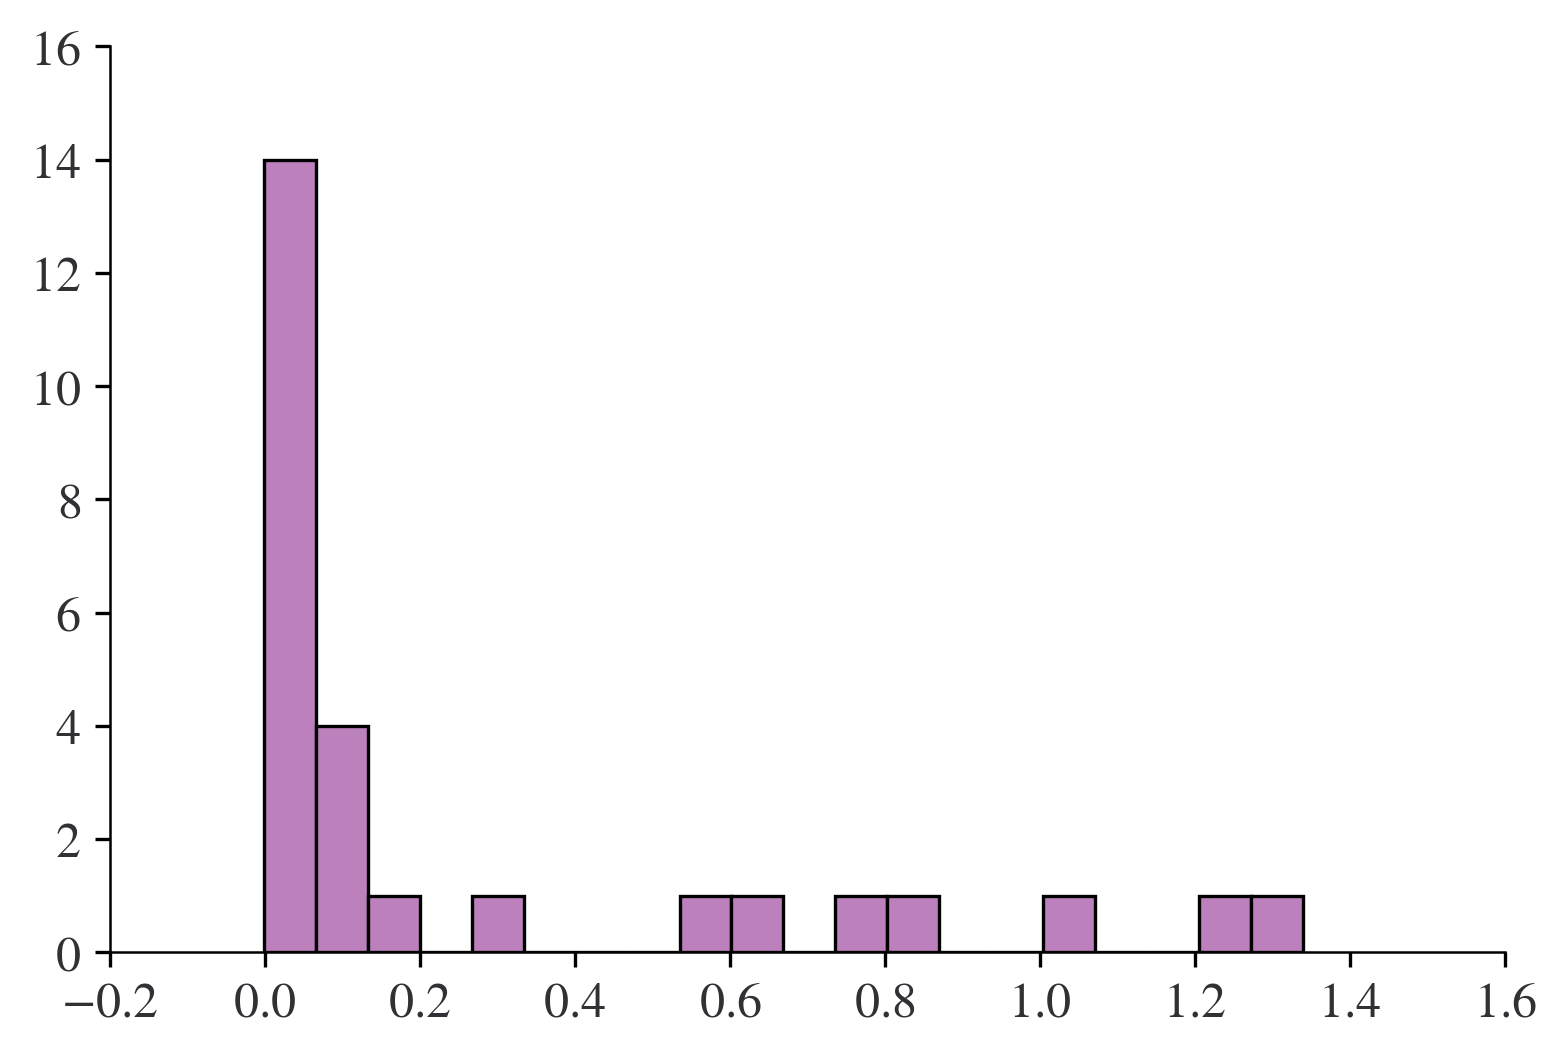

In [53]:
_=plt.hist(list(t_stat_dict.values()), bins =20)

Text(0.0, 1.0, 'median distance = 0.0291. Best width: 0.11')

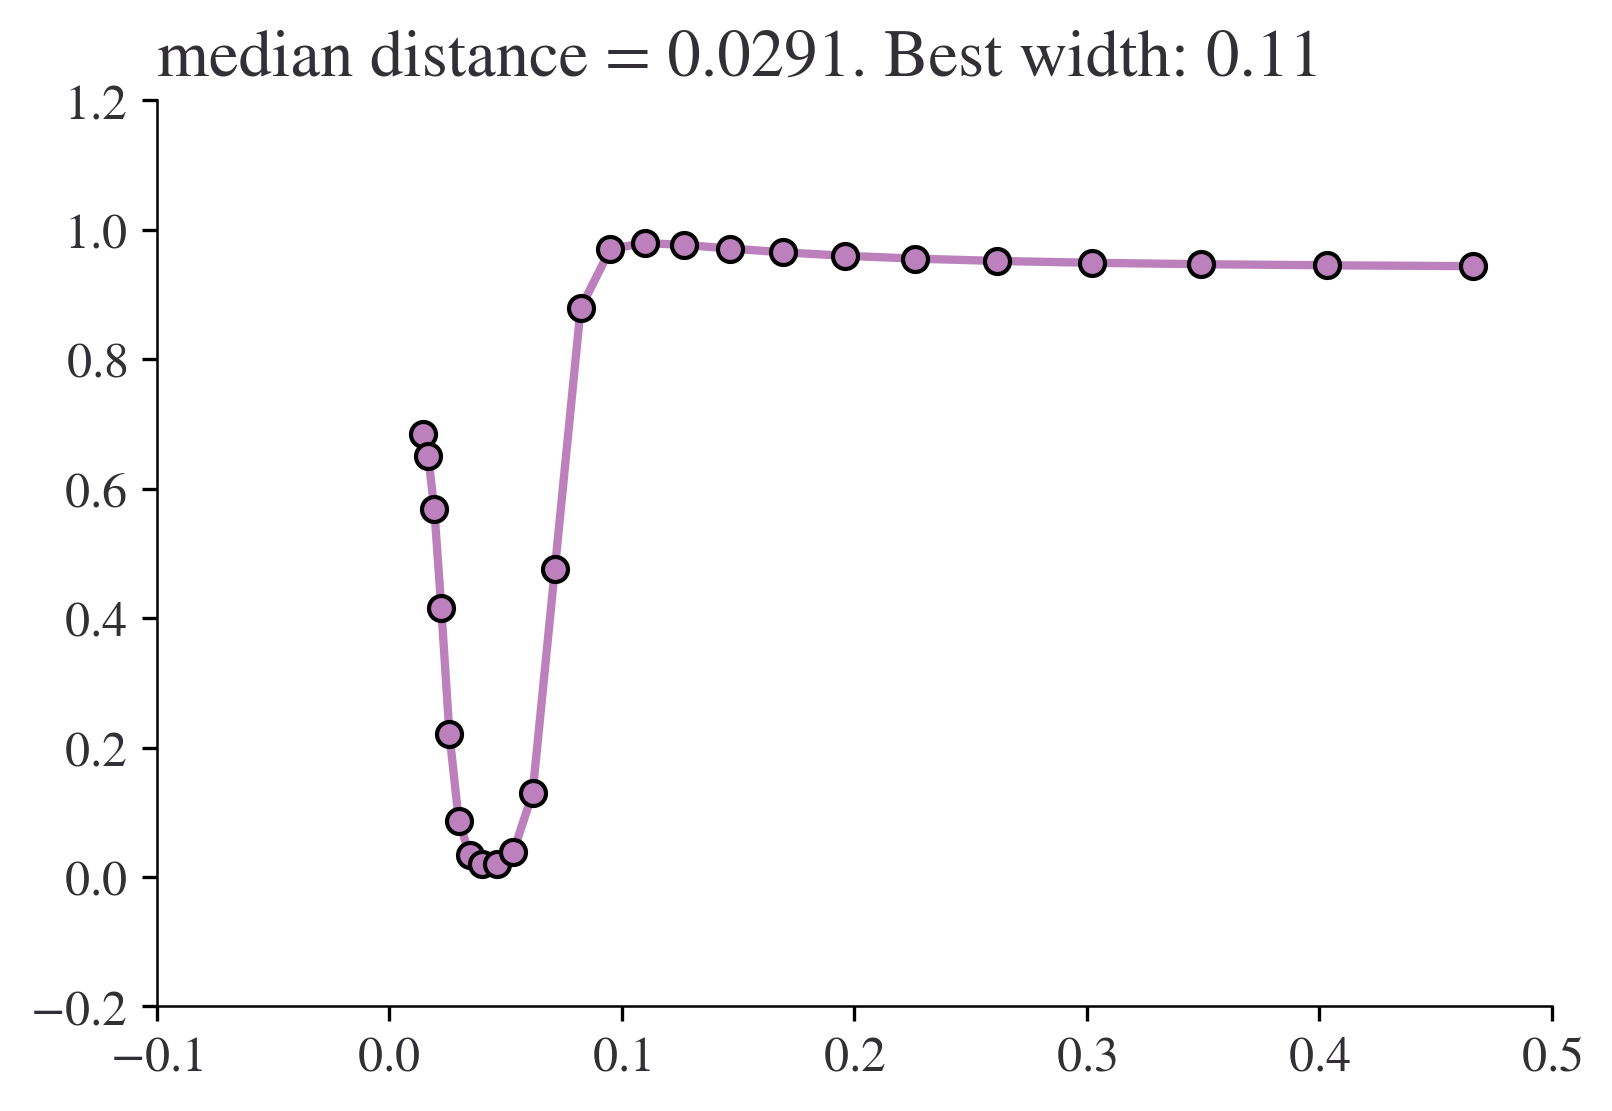

In [15]:
plt.plot(widths, powers, 'o-')
plt.title('median distance = %.3g. Best width: %.3g'%(med, widths[besti]) )

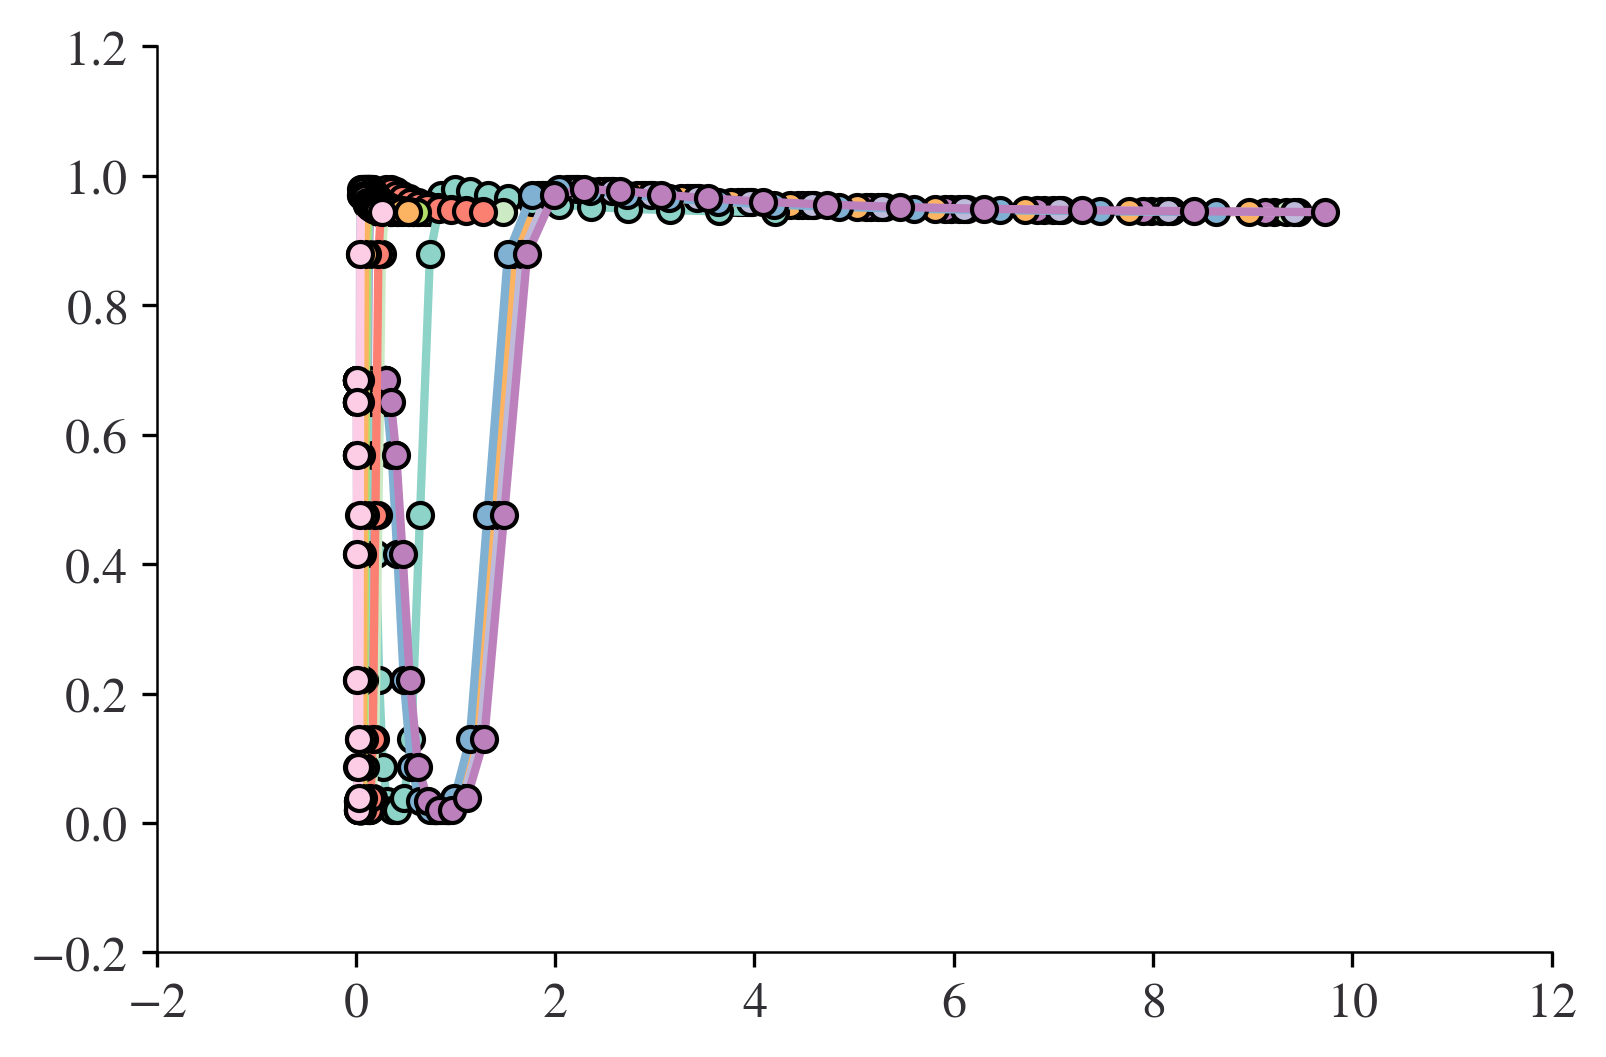

In [16]:
widths_best_dict = dict()
for idx_key in range(0,27):
    widths = file_idx_dict[idx_key]['widths']
    med =file_idx_dict[idx_key]['med']
    besti =file_idx_dict[idx_key]['besti']
    widths_best_dict[idx_key]=(med, widths[besti])
    plt.plot(widths, powers, 'o-')
    #plt.title('median distance = %.3g. Best width: %.3g'%(med, widths[besti]) )

In [106]:
widths_med_df = pd.DataFrame(widths_best_dict).T

In [116]:
widths_med_df_2  = widths_med_df.rename({0: 'med', 1: 'besti'}, axis='columns')

## alpha

In [55]:
symbol = 'FB1'
var_string ='alpha' # mass exponent
symbol_var_files =[f for f in os.listdir(LinearMMD_folder) if str(symbol) in f if str(var_string) in f]

In [ ]:
file_idx = 4
file_loc = os.path.join(LinearMMD_folder, symbol_var_files[file_idx])
file_idx_dict = pd.read_pickle(file_loc)
idx_keys = list(file_idx_dict.keys())
print(len(idx_keys))